This notebook is used to interactively generate stimuli

Code by Warren Woodrich Pettine, M.D. and was last updated 2023-11-14.

In [1]:
from create_drone_stims import *
from glob import glob

# Stimulus design
## Calculate the distance between stimuli

In [2]:
# Load stim names from file
stim_dir = '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/'
f_names = glob(os.path.join(stim_dir,'drone*'))
print(f_names)

prototype_code = '0-A-3_1-B-1_2-C-4_3-D-3_4-E-4_5-A-2_6-B-3_7-C-1_8-D-1_9-E-1'.split('_')
distance = []
for f_name in f_names:
    stim_code = f_name.split('/')[-1].split('.')[0].split('drone_')[-1].split('_')
    distance.append(sum([proto_val != stim_val for proto_val, stim_val in zip(prototype_code,stim_code)]))

['/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-3_1-B-1_2-C-4_3-D-3_4-E-4_5-A-2_6-B-3_7-C-1_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-4_1-B-2_2-C-4_3-D-3_4-E-4_5-A-2_6-B-3_7-C-1_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-4_1-B-1_2-C-4_3-D-3_4-E-4_5-A-2_6-B-3_7-C-1_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-4_1-B-1_2-C-3_3-D-3_4-E-4_5-A-2_6-B-3_7-C-1_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-4_1-B-1_2-C-4_3-D-3_4-E-4_5-A-2_6-B-3_7-C-2_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experiments/Stimuli/drone_recon/drones_coded/drone_0-A-4_1-B-1_2-C-4_3-D-3_4-E-4_5-A-2_6-B-4_7-C-1_8-D-1_9-E-1.ai', '/Users/warrenpettine/Dropbox/_PettineLab/Experimen

## Generate stimulus codes
### Create prototypes

In [5]:
A_prototype_code, B_prototype_code, A_prototype_name, B_prototype_name = makeRandomAB()

print(A_prototype_name)
print(B_prototype_name)

0-A-4_1-E-4_2-E-1_3-C-2_4-B-4_5-D-4_6-C-3_7-D-2_8-B-1_9-A-1
0-A-3_1-E-3_2-E-2_3-C-1_4-B-3_5-D-3_6-C-4_7-D-1_8-B-2_9-A-2


## Create images

# Make a single image to manipulate locations

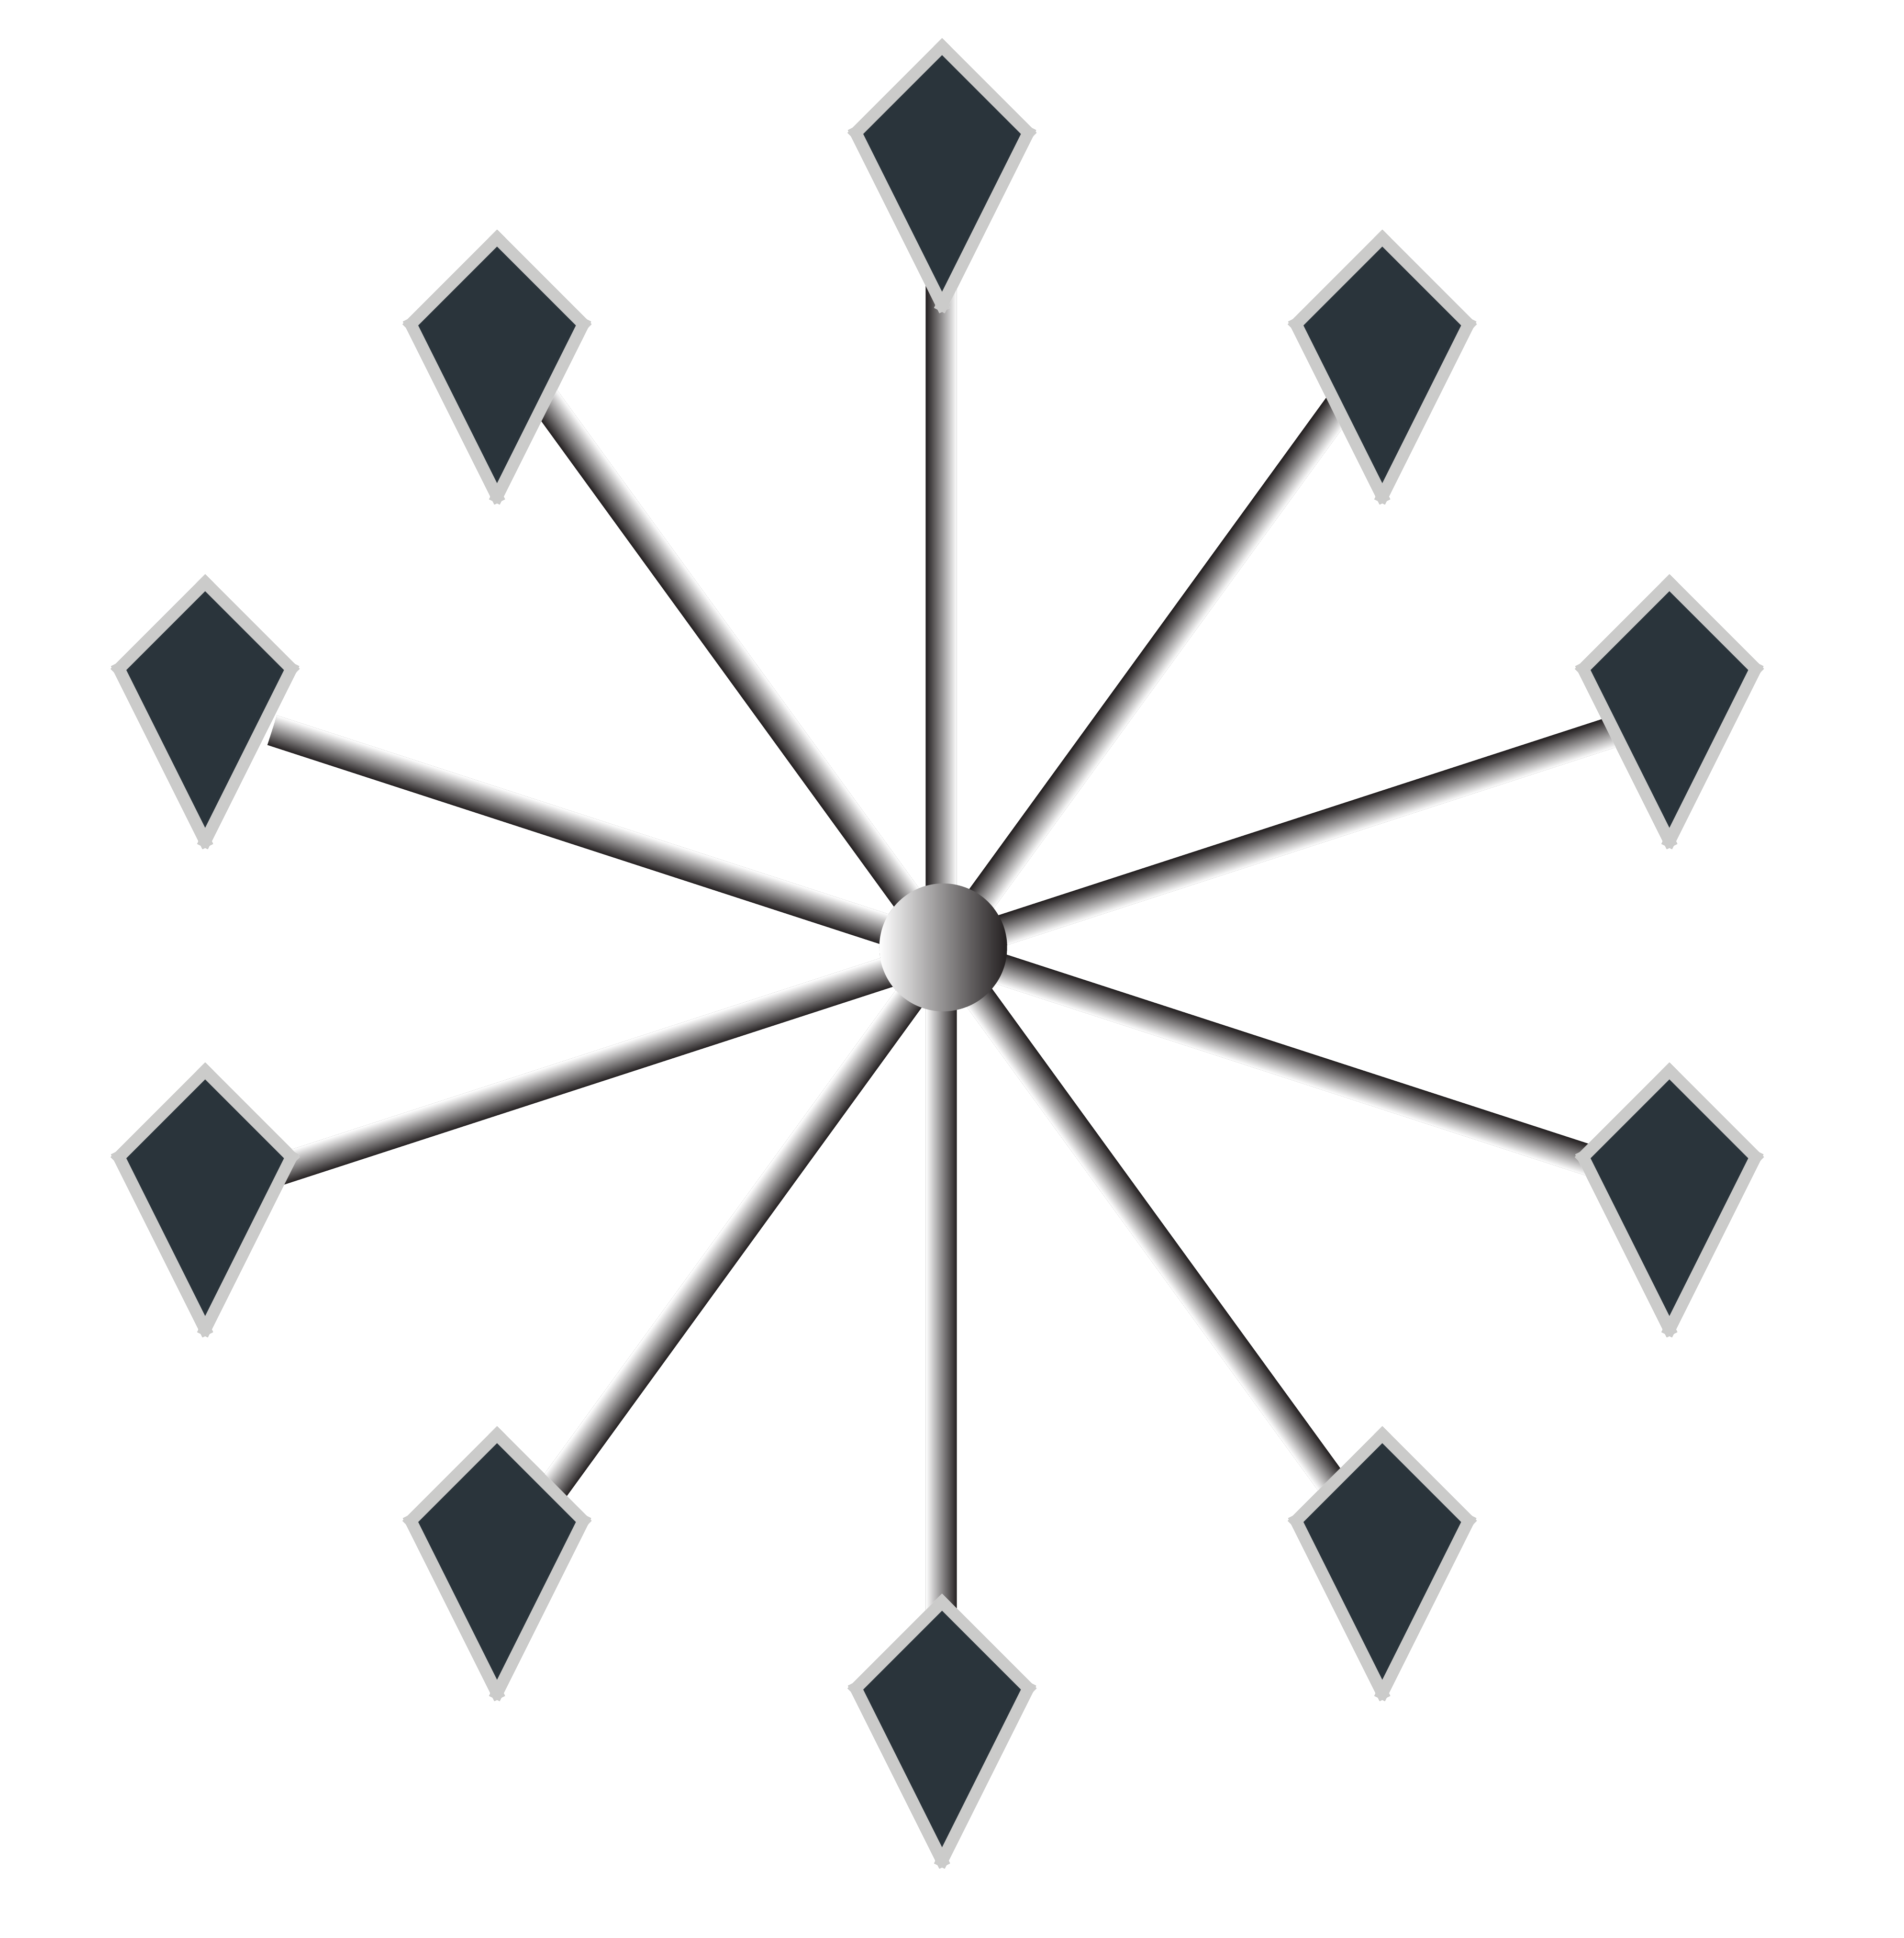

In [3]:
# Position 6
coords = getCoords()

component_dir = os.getcwd() + '/drone_components/png_components' # Make sure the os.getcwd() produces a valid filepath


img_2 = 'D-1'
# Open the images
img1 = Image.open(os.path.join(component_dir,'drone_frame.png')).convert('RGBA')
img2 = Image.open(os.path.join(component_dir,img_2+'.png')).convert('RGBA')

image_scale = 1.4

center = (550,550)

# Create a new image with the same size as img1
new_img = Image.new('RGBA', tuple(np.round(np.array(img1.size)*image_scale).astype(int)), (0, 0, 0, 0))

# # Paste img1 onto the new image at position (0, 0)
new_img.paste(img1, center,img1)

places = ['0','1','2','3','4','5','6','7','8','9']

for place in places:
    coord_base = coords[place][img_2]
    coord = shiftCoord(coord_base, center)
    new_img.paste(img2, tuple(coord),img2)

# Paste img1 onto the new image at position (0, 0)
# new_img.paste(img1, center,img1)

# new_img = ImageOps.colorize(new_img.convert('L'), (0, 0, 0), (255, 255, 255))

display(new_img)
# plt.show()
# Save the new image
# new_img.save('new_image.png')

## Go through and build all feature indices for a single coordinate configuration (default one)

Of note, by also looping through coordinate_indices one can shuffle the feature location. The combinatorics explode, however.

In [ ]:
pairs = getPairs()
feature_indices, coordinate_indices = createDroneIndices(N=pairs.shape[0])
feature_combos = makeFeatureCombos(feature_indices, pairs)
coords = getCoords()

component_dir = os.getcwd() + '/drone_components/png_components' # Make sure the os.getcwd() produces a valid filepath

features = pairs.flatten()

image_scale = 1.38
center = (550,550)
save_bool=False

save_dir = 'drone_pngs/'

for s in range(len(feature_combos)):
    drone_img, drone_name = createDrone(feature_combos[s],features,image_scale=image_scale,center=center,places=None,
                                        component_dir=component_dir,save_dir=save_dir,save_bool=save_bool,coords=coords)

## Get names of A and B stims to put in webapp
Using this method one, can make file names manually and copy them over to the section of the webapp.

In [7]:
A_prototype_f_name = '0-A-1_1-B-2_2-C-1_3-D-2_4-E-1_5-A-4_6-B-4_7-C-3_8-D-4_9-E-4'
B_prototype_f_name = '0-A-2_1-B-1_2-C-2_3-D-1_4-E-2_5-A-3_6-B-3_7-C-4_8-D-3_9-E-3'

A_prototype_codes = np.array(A_prototype_f_name.split('_'))
B_prototype_codes = np.array(B_prototype_f_name.split('_'))

counts = [7,8,8,7]

def distanceStimNames(prototype_1,prototype_2,distance=1,n_stims=10):
    switch_indices = createDistanceIndices(prototype_1,distance=distance,n_stims=n_stims)

    stim_names = []
    for indice in switch_indices:
        copy_1 = prototype_1.copy()
        for i in range(len(indice)):
            copy_1[indice[i]] =  prototype_2[indice[i]]
        stim_names.append('_'.join(copy_1))
        
    return stim_names

d1_A = np.array(distanceStimNames(A_prototype_codes,B_prototype_codes,distance=1,n_stims=7))
d1_B = np.array(distanceStimNames(B_prototype_codes,A_prototype_codes,distance=1,n_stims=7))
d2_A = np.array(distanceStimNames(A_prototype_codes,B_prototype_codes,distance=2,n_stims=8))
d2_B = np.array(distanceStimNames(B_prototype_codes,A_prototype_codes,distance=2,n_stims=8))
d3_A = np.array(distanceStimNames(A_prototype_codes,B_prototype_codes,distance=3,n_stims=8))
d3_B = np.array(distanceStimNames(B_prototype_codes,A_prototype_codes,distance=3,n_stims=8))
d4_A = np.array(distanceStimNames(A_prototype_codes,B_prototype_codes,distance=4,n_stims=7))
d4_B = np.array(distanceStimNames(B_prototype_codes,A_prototype_codes,distance=4,n_stims=7))

train_A = [A_prototype_f_name] + list(d1_A[:2]) + list(d2_A[:3]) + list(d3_A[:3]) + list(d4_A[:2])
train_B = [B_prototype_f_name] + list(d1_B[:2]) + list(d2_B[:3]) + list(d3_B[:3]) + list(d4_B[:2])
test_A = [A_prototype_f_name] + list(d1_A[2:]) + list(d2_A[3:]) + list(d3_A[3:]) + list(d4_A[2:])
test_B = [B_prototype_f_name] + list(d1_B[2:]) + list(d2_B[3:]) + list(d3_B[3:]) + list(d4_B[2:])